In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
device = "cuda" if torch.cuda.is_available else "cpu"
lr = 3e-4
z_dim = 64
image_dim = 28 * 28 * 1
batch_size = 32
num_epochs = 150

In [3]:
class Discriminator(nn.Module):
    def __init__(self, img_dim):
        super().__init__()
        self.discriminator = nn.Sequential(
            nn.Linear(img_dim, 128),
            nn.LeakyReLU(0.1),
            nn.Linear(128, 1),
            nn.Sigmoid(),
        )
        
    def forward(self, x):
        return self.discriminator(x)

In [4]:
class Generator(nn.Module):
    def __init__(self, z_dim, img_dim):
        super().__init__()
        self.generator = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.LeakyReLU(0.1),
            nn.Linear(256, img_dim),
            nn.Tanh(),
        )
        
    def forward(self, x):
        return self.generator(x)

In [5]:
discriminator = Discriminator(image_dim)
generator = Generator(z_dim, image_dim)
initial_noise = torch.randn((batch_size, z_dim))

In [6]:
transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [7]:
dataset = datasets.MNIST(root="dataset/", transform=transforms, download=True)

In [8]:
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [9]:
opt_disc = optim.Adam(discriminator.parameters(), lr=lr)
opt_gen = optim.Adam(generator.parameters(), lr=lr)

In [10]:
loss = nn.BCELoss()

In [11]:
writer_fake = SummaryWriter(f"runs/GAN_MNIST/fake")
writer_real = SummaryWriter(f"runs/GAN_MNIST/real")

In [12]:
def show_images(fake_images, real_images, epoch):
    fake_images = fake_images.detach().cpu().numpy()
    real_images = real_images.detach().cpu().numpy()

    fig, ax = plt.subplots(2, 8, figsize=(15, 4))
    
    for i in range(8):
        ax[0, i].imshow(fake_images[i][0], cmap='gray', vmin=-1, vmax=1)
        ax[0, i].axis('off')
        ax[0, i].set_title("Fake")

        ax[1, i].imshow(real_images[i][0], cmap='gray', vmin=-1, vmax=1)
        ax[1, i].axis('off')
        ax[1, i].set_title("Real")

    plt.suptitle(f'Epoch {epoch}', fontsize=16)
    plt.show()

Epoch [0/150]Loss D: 0.5524, Loss G: 0.6673


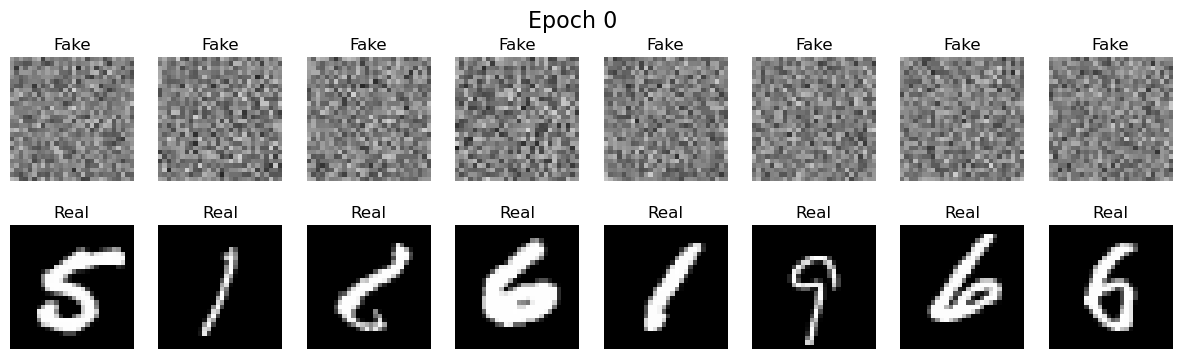

Epoch [1/150]Loss D: 0.6318, Loss G: 0.8871
Epoch [2/150]Loss D: 0.6169, Loss G: 0.7868
Epoch [3/150]Loss D: 0.5393, Loss G: 1.2914
Epoch [4/150]Loss D: 0.8385, Loss G: 0.6562
Epoch [5/150]Loss D: 0.8596, Loss G: 0.7028
Epoch [6/150]Loss D: 0.5285, Loss G: 1.2517
Epoch [7/150]Loss D: 0.7364, Loss G: 0.7350
Epoch [8/150]Loss D: 0.4675, Loss G: 1.1973
Epoch [9/150]Loss D: 0.5416, Loss G: 1.1139
Epoch [10/150]Loss D: 0.7260, Loss G: 0.9352


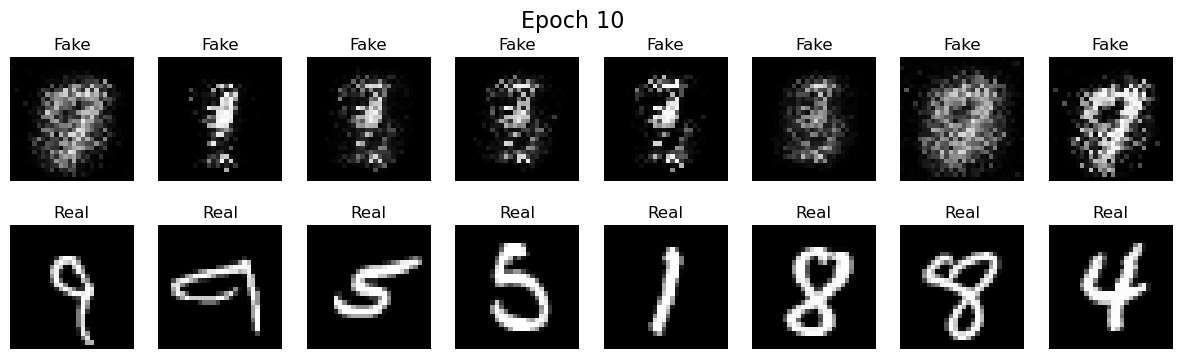

Epoch [11/150]Loss D: 0.8484, Loss G: 0.7632
Epoch [12/150]Loss D: 0.6978, Loss G: 0.9274
Epoch [13/150]Loss D: 0.9437, Loss G: 0.7309
Epoch [14/150]Loss D: 0.6267, Loss G: 1.0733
Epoch [15/150]Loss D: 0.5077, Loss G: 1.2959
Epoch [16/150]Loss D: 0.6080, Loss G: 1.0178
Epoch [17/150]Loss D: 0.5260, Loss G: 1.3339
Epoch [18/150]Loss D: 0.5314, Loss G: 1.4695
Epoch [19/150]Loss D: 0.6519, Loss G: 0.9632
Epoch [20/150]Loss D: 0.5957, Loss G: 0.9338


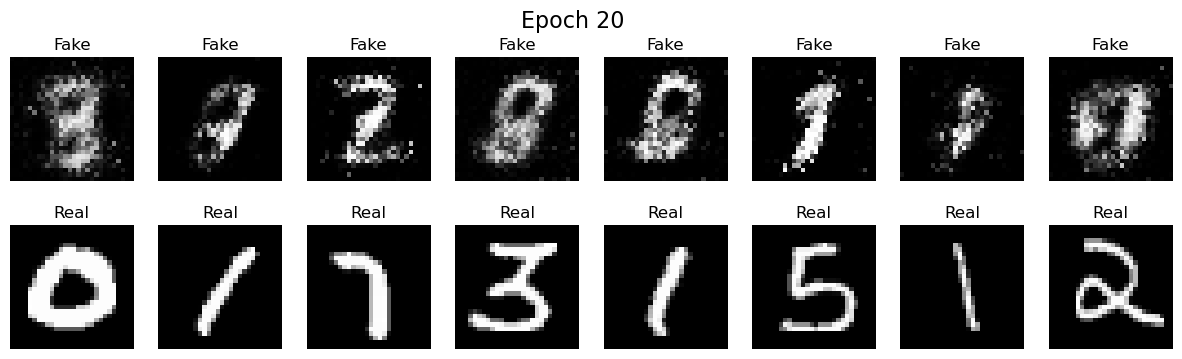

Epoch [21/150]Loss D: 0.5599, Loss G: 1.3156
Epoch [22/150]Loss D: 0.6801, Loss G: 1.0105
Epoch [23/150]Loss D: 0.6255, Loss G: 1.0824
Epoch [24/150]Loss D: 0.7274, Loss G: 0.8770
Epoch [25/150]Loss D: 0.4346, Loss G: 1.2460
Epoch [26/150]Loss D: 0.6662, Loss G: 0.8817
Epoch [27/150]Loss D: 0.6741, Loss G: 0.8848
Epoch [28/150]Loss D: 0.5896, Loss G: 0.9481
Epoch [29/150]Loss D: 0.6039, Loss G: 0.8583
Epoch [30/150]Loss D: 0.6277, Loss G: 1.1207


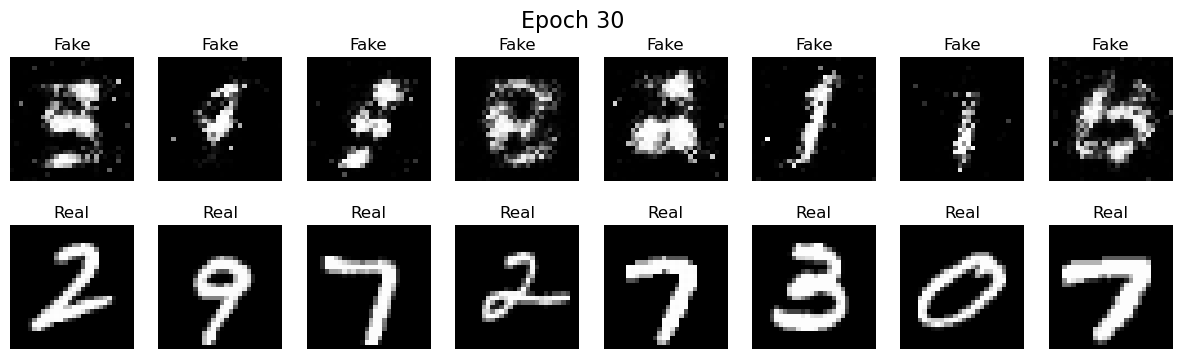

Epoch [31/150]Loss D: 0.6069, Loss G: 1.1116
Epoch [32/150]Loss D: 0.5845, Loss G: 1.0719
Epoch [33/150]Loss D: 0.6371, Loss G: 0.9858
Epoch [34/150]Loss D: 0.5824, Loss G: 0.9323
Epoch [35/150]Loss D: 0.6298, Loss G: 1.2092
Epoch [36/150]Loss D: 0.6840, Loss G: 1.0392
Epoch [37/150]Loss D: 0.6690, Loss G: 0.7933
Epoch [38/150]Loss D: 0.7035, Loss G: 0.7679
Epoch [39/150]Loss D: 0.6457, Loss G: 0.7418
Epoch [40/150]Loss D: 0.6025, Loss G: 0.9648


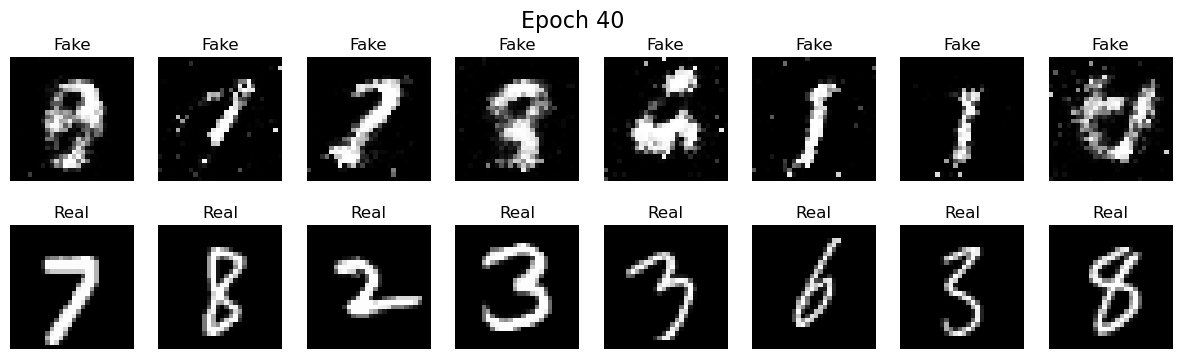

Epoch [41/150]Loss D: 0.5584, Loss G: 0.8761
Epoch [42/150]Loss D: 0.5427, Loss G: 1.0322
Epoch [43/150]Loss D: 0.8214, Loss G: 0.8054
Epoch [44/150]Loss D: 0.6685, Loss G: 0.8507
Epoch [45/150]Loss D: 0.7091, Loss G: 0.8302
Epoch [46/150]Loss D: 0.7384, Loss G: 0.6579
Epoch [47/150]Loss D: 0.5809, Loss G: 0.9868
Epoch [48/150]Loss D: 0.6577, Loss G: 0.9286
Epoch [49/150]Loss D: 0.7011, Loss G: 0.8587
Epoch [50/150]Loss D: 0.6077, Loss G: 1.0679


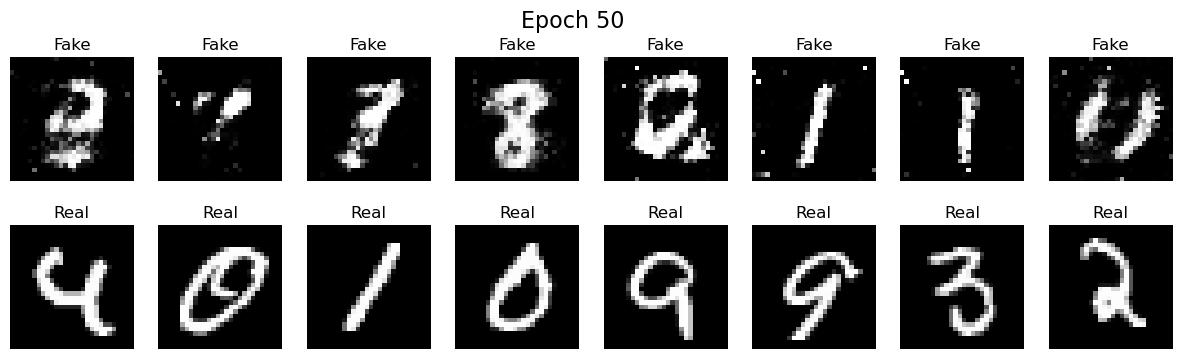

Epoch [51/150]Loss D: 0.6267, Loss G: 0.9618
Epoch [52/150]Loss D: 0.6679, Loss G: 0.9023
Epoch [53/150]Loss D: 0.6763, Loss G: 0.8823
Epoch [54/150]Loss D: 0.7561, Loss G: 0.7648
Epoch [55/150]Loss D: 0.7625, Loss G: 0.9003
Epoch [56/150]Loss D: 0.5681, Loss G: 0.9211
Epoch [57/150]Loss D: 0.6646, Loss G: 0.8134
Epoch [58/150]Loss D: 0.6322, Loss G: 0.9243
Epoch [59/150]Loss D: 0.6059, Loss G: 0.8478
Epoch [60/150]Loss D: 0.7492, Loss G: 0.8899


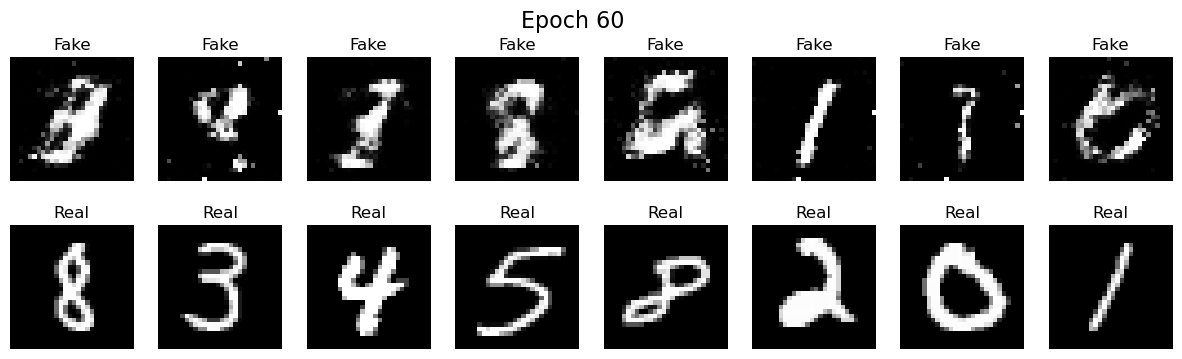

Epoch [61/150]Loss D: 0.7603, Loss G: 0.8328
Epoch [62/150]Loss D: 0.6355, Loss G: 0.8136
Epoch [63/150]Loss D: 0.5052, Loss G: 1.0853
Epoch [64/150]Loss D: 0.6190, Loss G: 0.8727
Epoch [65/150]Loss D: 0.6800, Loss G: 0.8819
Epoch [66/150]Loss D: 0.6402, Loss G: 1.0164
Epoch [67/150]Loss D: 0.5457, Loss G: 1.1835
Epoch [68/150]Loss D: 0.6958, Loss G: 0.7431
Epoch [69/150]Loss D: 0.6329, Loss G: 0.8833
Epoch [70/150]Loss D: 0.6045, Loss G: 0.9410


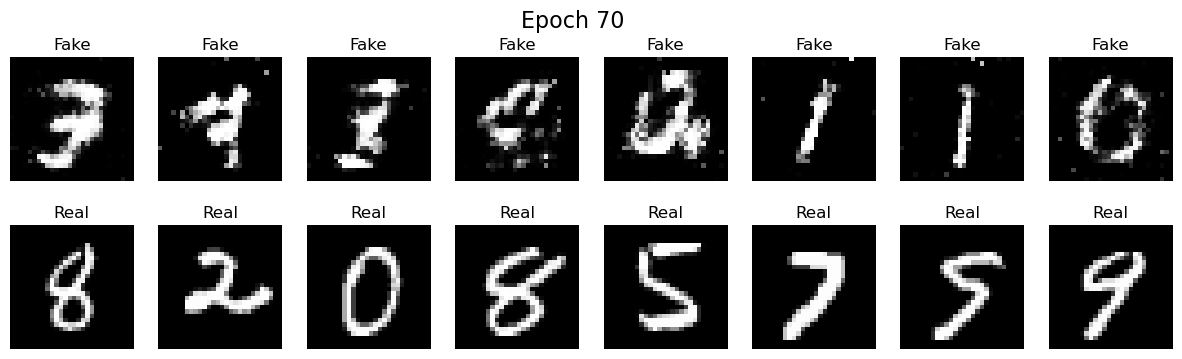

Epoch [71/150]Loss D: 0.6460, Loss G: 0.8256
Epoch [72/150]Loss D: 0.6224, Loss G: 1.0236
Epoch [73/150]Loss D: 0.5118, Loss G: 1.0500
Epoch [74/150]Loss D: 0.4859, Loss G: 1.1074
Epoch [75/150]Loss D: 0.6351, Loss G: 0.9775
Epoch [76/150]Loss D: 0.6888, Loss G: 0.9804
Epoch [77/150]Loss D: 0.6063, Loss G: 0.8584
Epoch [78/150]Loss D: 0.7231, Loss G: 0.7623
Epoch [79/150]Loss D: 0.5506, Loss G: 1.0727
Epoch [80/150]Loss D: 0.6701, Loss G: 0.8178


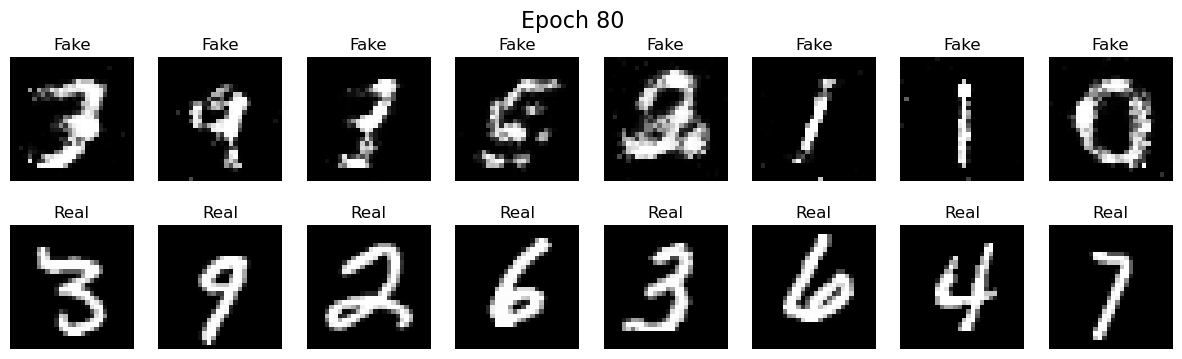

Epoch [81/150]Loss D: 0.7165, Loss G: 0.7419
Epoch [82/150]Loss D: 0.6175, Loss G: 0.8381
Epoch [83/150]Loss D: 0.6221, Loss G: 1.0089
Epoch [84/150]Loss D: 0.6897, Loss G: 0.8507
Epoch [85/150]Loss D: 0.5629, Loss G: 1.0387
Epoch [86/150]Loss D: 0.5879, Loss G: 0.9092
Epoch [87/150]Loss D: 0.6416, Loss G: 0.8730
Epoch [88/150]Loss D: 0.6476, Loss G: 0.8293
Epoch [89/150]Loss D: 0.6092, Loss G: 0.9014
Epoch [90/150]Loss D: 0.6460, Loss G: 0.8244


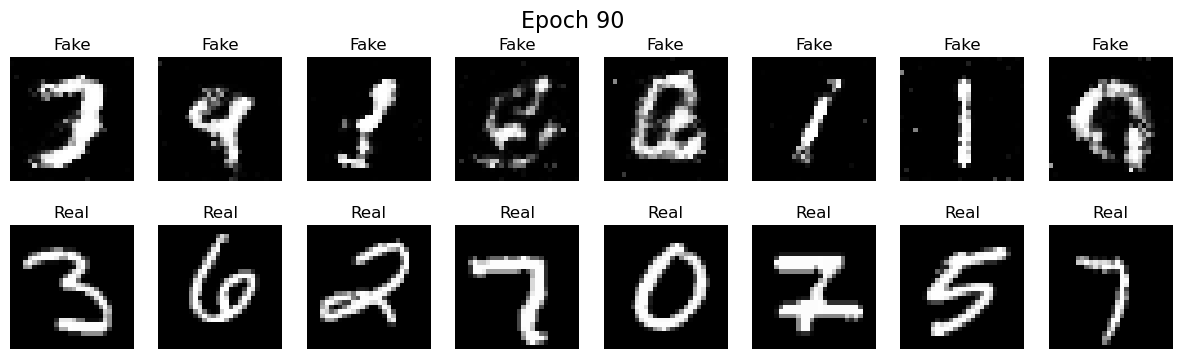

Epoch [91/150]Loss D: 0.5366, Loss G: 1.0944
Epoch [92/150]Loss D: 0.5041, Loss G: 1.0708
Epoch [93/150]Loss D: 0.6065, Loss G: 1.1148
Epoch [94/150]Loss D: 0.5692, Loss G: 1.1579
Epoch [95/150]Loss D: 0.5991, Loss G: 1.0080
Epoch [96/150]Loss D: 0.6244, Loss G: 0.8093
Epoch [97/150]Loss D: 0.7147, Loss G: 0.9638
Epoch [98/150]Loss D: 0.5514, Loss G: 0.9024
Epoch [99/150]Loss D: 0.5927, Loss G: 1.0198
Epoch [100/150]Loss D: 0.5500, Loss G: 1.1237


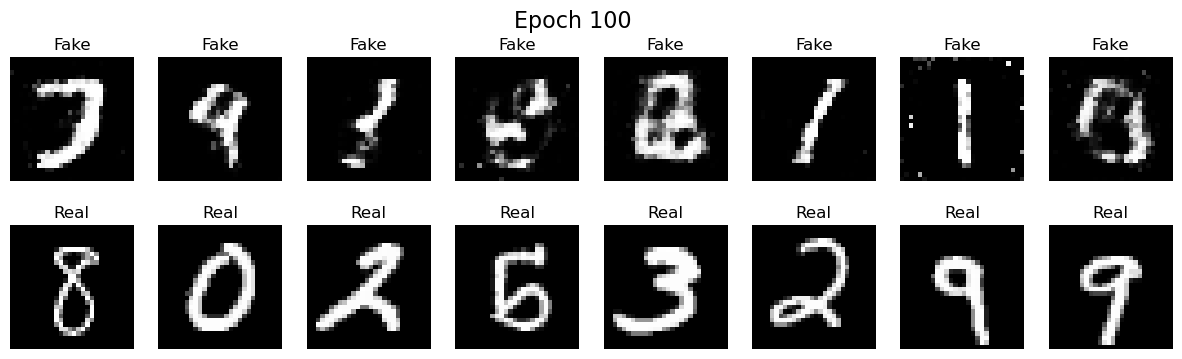

Epoch [101/150]Loss D: 0.5402, Loss G: 1.1304
Epoch [102/150]Loss D: 0.6130, Loss G: 1.2634
Epoch [103/150]Loss D: 0.5595, Loss G: 0.9843
Epoch [104/150]Loss D: 0.6057, Loss G: 0.8322
Epoch [105/150]Loss D: 0.5346, Loss G: 1.0003
Epoch [106/150]Loss D: 0.5862, Loss G: 0.9873
Epoch [107/150]Loss D: 0.5470, Loss G: 1.0178
Epoch [108/150]Loss D: 0.5652, Loss G: 1.2435
Epoch [109/150]Loss D: 0.5513, Loss G: 1.0403
Epoch [110/150]Loss D: 0.5961, Loss G: 1.0026


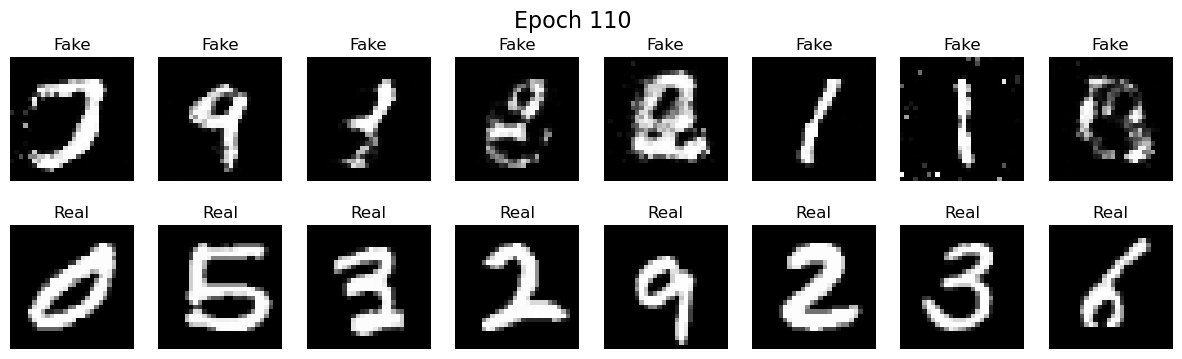

Epoch [111/150]Loss D: 0.6188, Loss G: 1.1108
Epoch [112/150]Loss D: 0.6579, Loss G: 1.0321
Epoch [113/150]Loss D: 0.5600, Loss G: 0.8778
Epoch [114/150]Loss D: 0.5852, Loss G: 1.1715
Epoch [115/150]Loss D: 0.5339, Loss G: 1.1822
Epoch [116/150]Loss D: 0.6118, Loss G: 0.9011
Epoch [117/150]Loss D: 0.5928, Loss G: 1.0563
Epoch [118/150]Loss D: 0.5984, Loss G: 0.6967
Epoch [119/150]Loss D: 0.6409, Loss G: 0.8198
Epoch [120/150]Loss D: 0.5133, Loss G: 1.1316


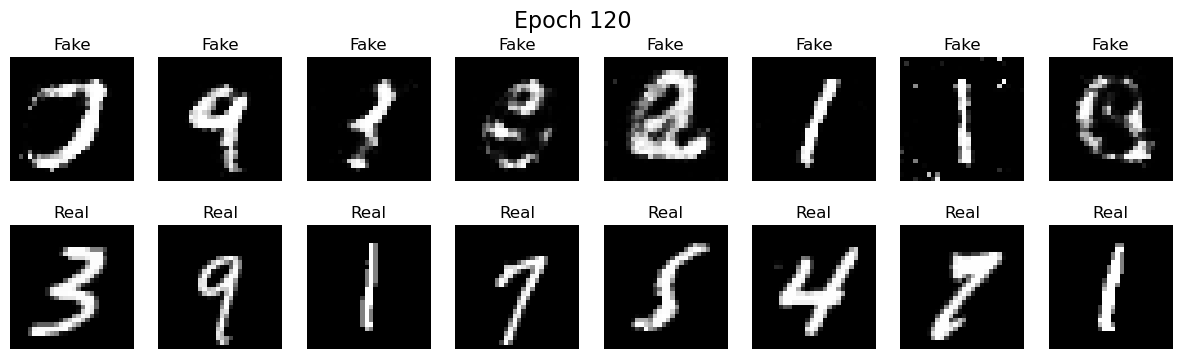

Epoch [121/150]Loss D: 0.6043, Loss G: 1.0102
Epoch [122/150]Loss D: 0.6059, Loss G: 1.1507
Epoch [123/150]Loss D: 0.5635, Loss G: 1.1209
Epoch [124/150]Loss D: 0.6420, Loss G: 0.9689
Epoch [125/150]Loss D: 0.5894, Loss G: 1.1884
Epoch [126/150]Loss D: 0.5509, Loss G: 1.1770
Epoch [127/150]Loss D: 0.5394, Loss G: 1.0597
Epoch [128/150]Loss D: 0.6094, Loss G: 1.1767
Epoch [129/150]Loss D: 0.6070, Loss G: 1.0049
Epoch [130/150]Loss D: 0.6094, Loss G: 0.8819


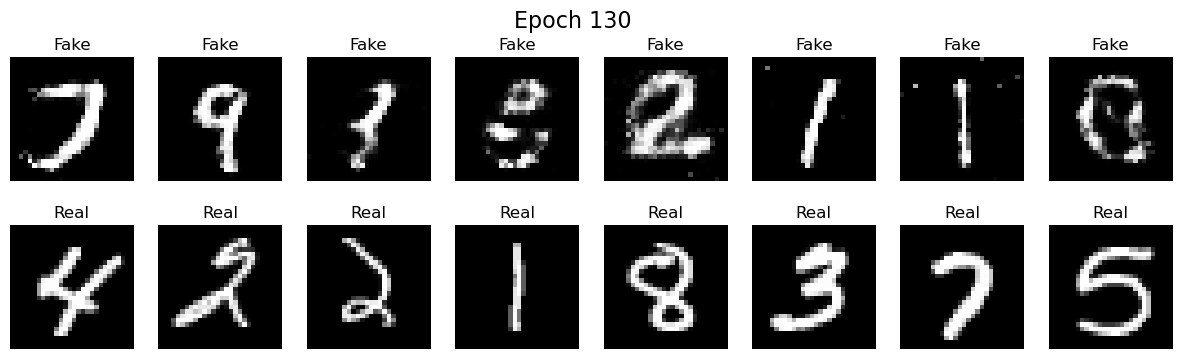

Epoch [131/150]Loss D: 0.5538, Loss G: 1.2097
Epoch [132/150]Loss D: 0.6743, Loss G: 0.8993
Epoch [133/150]Loss D: 0.6132, Loss G: 0.8268
Epoch [134/150]Loss D: 0.4987, Loss G: 1.1210
Epoch [135/150]Loss D: 0.6089, Loss G: 0.9476
Epoch [136/150]Loss D: 0.5695, Loss G: 0.9602
Epoch [137/150]Loss D: 0.6358, Loss G: 1.1033
Epoch [138/150]Loss D: 0.7113, Loss G: 0.9194
Epoch [139/150]Loss D: 0.6089, Loss G: 1.1074
Epoch [140/150]Loss D: 0.5673, Loss G: 0.9501


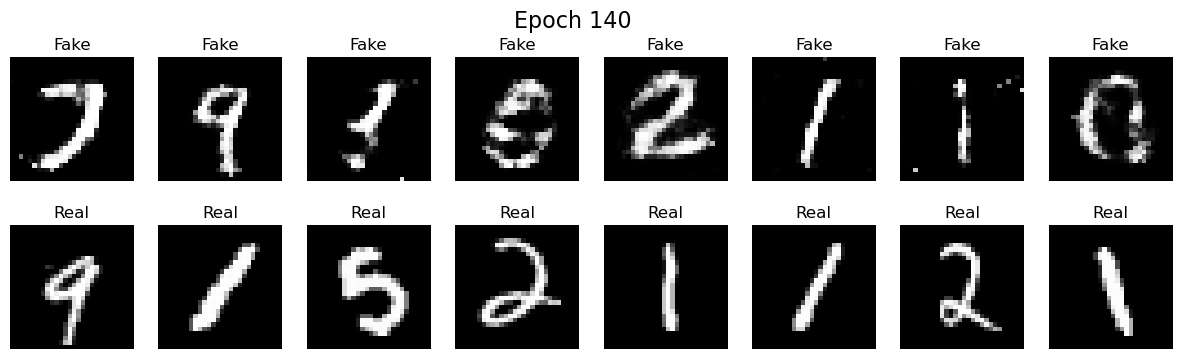

Epoch [141/150]Loss D: 0.6305, Loss G: 1.0275
Epoch [142/150]Loss D: 0.5346, Loss G: 1.2200
Epoch [143/150]Loss D: 0.5607, Loss G: 0.9848
Epoch [144/150]Loss D: 0.6135, Loss G: 0.9806
Epoch [145/150]Loss D: 0.5632, Loss G: 1.0805
Epoch [146/150]Loss D: 0.5398, Loss G: 1.2343
Epoch [147/150]Loss D: 0.5799, Loss G: 0.9448
Epoch [148/150]Loss D: 0.6330, Loss G: 0.7849
Epoch [149/150]Loss D: 0.7025, Loss G: 0.8447


In [17]:
step = 0

for epoch in range(num_epochs):
    for batch_idx, (real, _) in enumerate(loader):
        real = real.view(-1, 784)
        batch_size = real.shape[0]
        
        noise = torch.randn(batch_size, z_dim)
        fake = generator(noise)
        disc_real = discriminator(real).view(-1)
        lossD_real = loss(disc_real, torch.ones_like(disc_real))
        disc_fake = discriminator(fake.detach()).view(-1)
        lossD_fake = loss(disc_fake, torch.zeros_like(disc_fake))
        lossD = (lossD_real + lossD_fake) / 2
        discriminator.zero_grad()
        lossD.backward()
        opt_disc.step()
        
        output = discriminator(fake).view(-1)
        lossG = loss(output, torch.ones_like(output))
        generator.zero_grad()
        lossG.backward()
        opt_gen.step()
        
        if batch_idx == 0:
            print(f"Epoch [{epoch}/{num_epochs}]"
                  f"Loss D: {lossD:.4f}, Loss G: {lossG:.4f}")
            
            with torch.no_grad():
                fake = generator(initial_noise).reshape(-1, 1, 28, 28)
                data = real.reshape(-1, 1, 28, 28)
                
                img_grid_fake = torchvision.utils.make_grid(fake, normalize=True)
                img_grid_real = torchvision.utils.make_grid(data, normalize=True)
                
                writer_fake.add_image(
                    "MNIST Fake Images", img_grid_fake, global_step=step
                )
                
                writer_real.add_image(
                    "MNIST Real Images", img_grid_real, global_step=step
                )
                
                step += 1
                
                if epoch % 10 == 0:
                    show_images(fake, data, epoch)